In [58]:
#Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Load the Dataset

In [44]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [46]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Data Preprocessing

In [45]:
# Scale pixel values to a range between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [47]:
# Reshape the data to (num_samples, height, width, channels)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

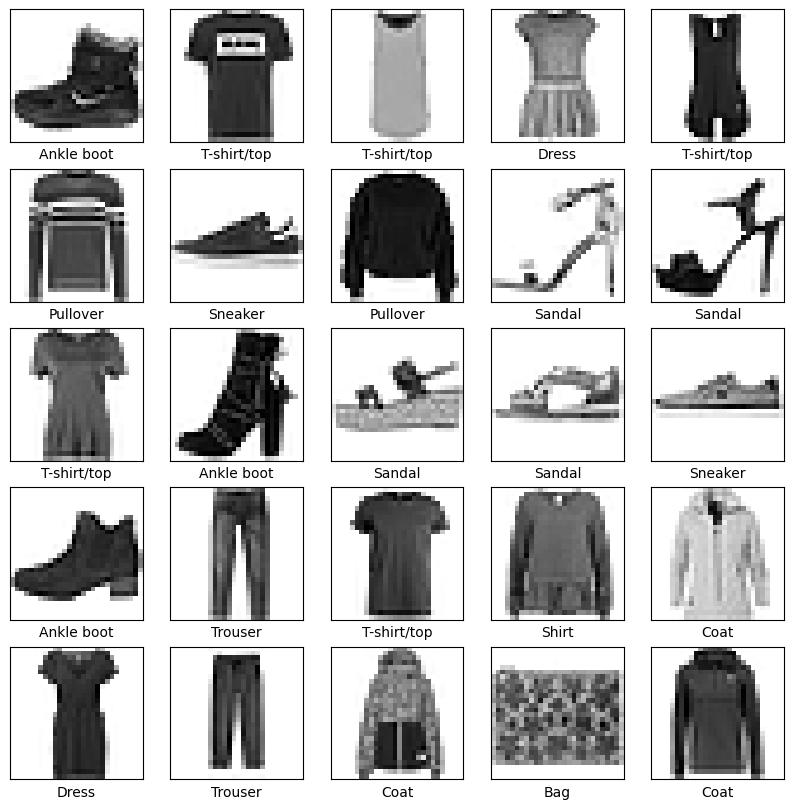

In [48]:
# Display sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

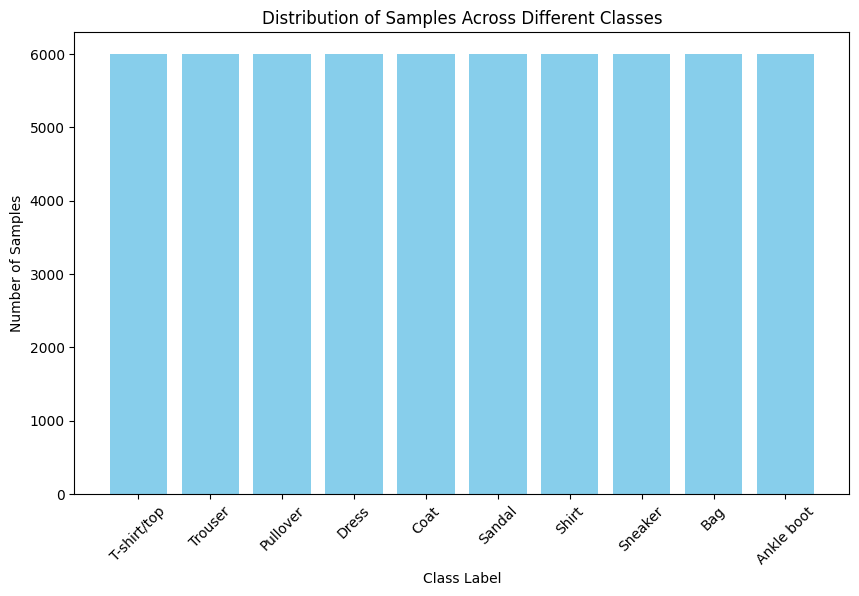

In [50]:
# Create a bar chart showing the distribution of samples across different classes
plt.figure(figsize=(10, 6))  # Set the figure size for the plot

# Create a bar plot of the distribution of samples across different classes
plt.bar(range(10), np.bincount(y_train), color='skyblue')

plt.xlabel('Class Label')  # Set the label for the x-axis
plt.ylabel('Number of Samples')  # Set the label for the y-axis
plt.title('Distribution of Samples Across Different Classes')  # Set the title of the plot

# Set the x-axis tick labels to display the class names
plt.xticks(range(10), class_names, rotation=45)

plt.show()  # Display the plot


All bars have nearly equal heights, indicating an almost uniform distribution of samples across the different classes.

# Build an Artificial Neural Network

In [52]:
# Data Augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,  # Random rotation within the range of -10 to +10 degrees
    width_shift_range=0.1,  # Random horizontal shift within the range of -0.1 to +0.1 of the total width
    height_shift_range=0.1,  # Random vertical shift within the range of -0.1 to +0.1 of the total height
    shear_range=0.1,  # Random shearing transformation within the range of -0.1 to +0.1 radians
    zoom_range=0.1,  # Random zoom within the range of 0.9 to 1.1
    horizontal_flip=True,  # Random horizontal flipping
    vertical_flip=True  # Random vertical flipping
)

In [53]:
# Build an Artificial Neural Network
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),                # Input layer with input shape (28, 28, 1) for grayscale images
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),  # Convolutional layer with 32 filters and ReLU activation
    layers.MaxPooling2D(pool_size=(2, 2)),          # Max pooling layer with pool size (2, 2)
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Another convolutional layer with 64 filters and ReLU activation
    layers.MaxPooling2D(pool_size=(2, 2)),          # Another max pooling layer
    layers.Flatten(),                               # Flatten layer to convert 2D feature maps to 1D feature vectors
    layers.Dense(256, activation='relu'),           # Dense hidden layer with 256 neurons and ReLU activation
    layers.BatchNormalization(),                    # Batch normalization layer for stabilizing and accelerating the training process
    layers.Dropout(0.5),                            # Dropout layer with dropout rate of 0.5 to prevent overfitting
    layers.Dense(10, activation='softmax')          # Output layer with 10 neurons (one for each class) and softmax activation
])


In [54]:
# Compile the Model
model.compile(optimizer=keras.optimizers.Adam(),             # Define the optimizer (Adam)
              loss='sparse_categorical_crossentropy',        # Define the loss function (sparse categorical crossentropy)
              metrics=['accuracy'])                          # Define the evaluation metric (accuracy)


In [55]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    factor=0.5,         # Factor by which the learning rate will be reduced. New_lr = lr * factor
    patience=3,         # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=0.00001      # Lower bound on the learning rate
)


In [56]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,                 # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Whether to restore the model weights from the epoch with the best value of the monitored metric
)


In [57]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),  # Augmented training data generator
    steps_per_epoch=len(x_train) / 32,              # Number of steps (batches) per epoch
    epochs=30,                                      # Number of epochs for training
    validation_data=(x_test, y_test),               # Validation data
    callbacks=[lr_scheduler, early_stopping]        # Callbacks for learning rate adjustment and early stopping
)


Epoch 1/30
1875/1875 [==============================] - 54s 28ms/step - loss: 0.7807 - accuracy: 0.7165 - val_loss: 0.5790 - val_accuracy: 0.7808 - lr: 0.0010
Epoch 2/30
1875/1875 [==============================] - 55s 29ms/step - loss: 0.6114 - accuracy: 0.7742 - val_loss: 0.4965 - val_accuracy: 0.8194 - lr: 0.0010
Epoch 3/30
1875/1875 [==============================] - 53s 28ms/step - loss: 0.5616 - accuracy: 0.7932 - val_loss: 0.4612 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 4/30
1875/1875 [==============================] - 54s 29ms/step - loss: 0.5296 - accuracy: 0.8045 - val_loss: 0.4003 - val_accuracy: 0.8502 - lr: 0.0010
Epoch 5/30
1875/1875 [==============================] - 51s 27ms/step - loss: 0.5117 - accuracy: 0.8105 - val_loss: 0.3878 - val_accuracy: 0.8578 - lr: 0.0010
Epoch 6/30
1875/1875 [==============================] - 51s 27ms/step - loss: 0.4927 - accuracy: 0.8180 - val_loss: 0.3972 - val_accuracy: 0.8560 - lr: 0.0010
Epoch 7/30
1875/1875 [========================

Early stopping is utilized to prevent overfitting by continuously monitoring a selected metric, such as validation loss or accuracy.

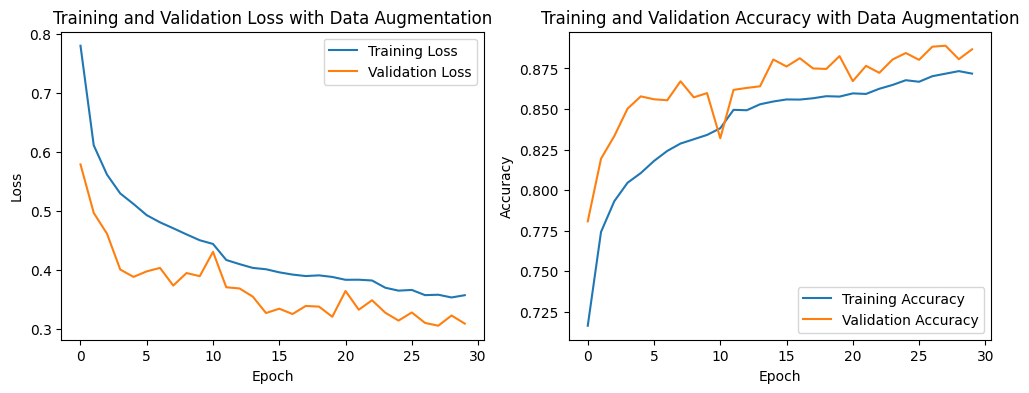

In [59]:
# Visualize training process with data augmentation
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss with Data Augmentation')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy with Data Augmentation')
plt.legend()

plt.show()

In [60]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3084 - accuracy: 0.8868 - 1s/epoch - 4ms/step

Test accuracy: 0.8867999911308289


The evaluation reports a test loss of 0.3084 and a test accuracy of 0.8868, indicating the model's ability to make accurate predictions on unseen data

1875/1875 [==============================] - 10s 5ms/step


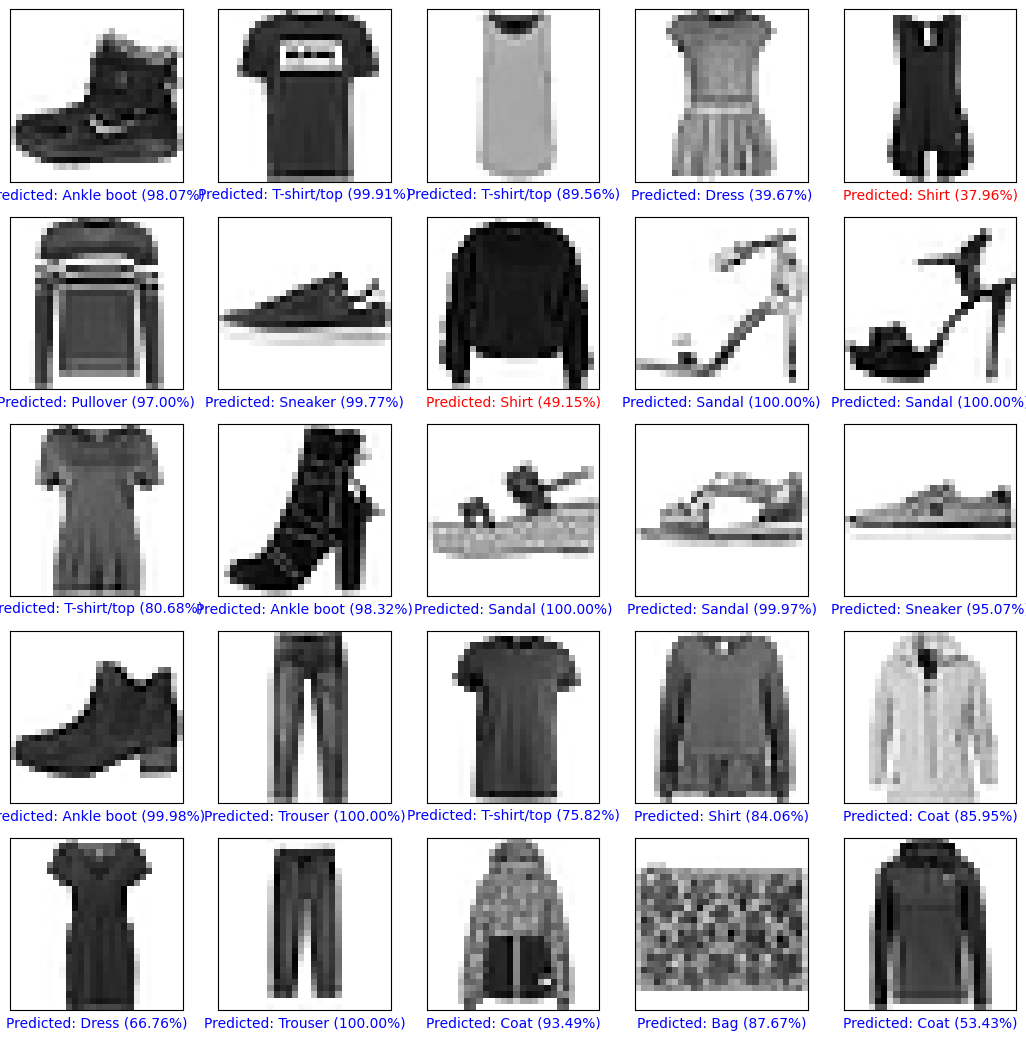

In [61]:
# Test Set Prediction
# Obtain predictions from the trained model on the test images
predictions = model.predict(x_train)

# Display a grid of test images along with their predicted labels
plt.figure(figsize=(13,13))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Display the test image
    plt.imshow(x_train[i].reshape(28, 28), cmap=plt.cm.binary)
    # Obtain the predicted label with the highest probability
    predicted_label = np.argmax(predictions[i])
    true_label = y_train[i]
    # Color the predicted label in green if correct, otherwise in red
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    # Display the predicted label along with its confidence percentage
    plt.xlabel(f'Predicted: {class_names[predicted_label]} ({100*np.max(predictions[i]):.2f}%)', color=color)
plt.show()